In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df = pd.read_csv(r"C:\Users\saran\Downloads\sales-of-shampoo-over-a-three-ye.csv",parse_dates=["Month"],index_col=[0])
df.drop(labels="Sales of shampoo over a three year period",axis=0,inplace=True)

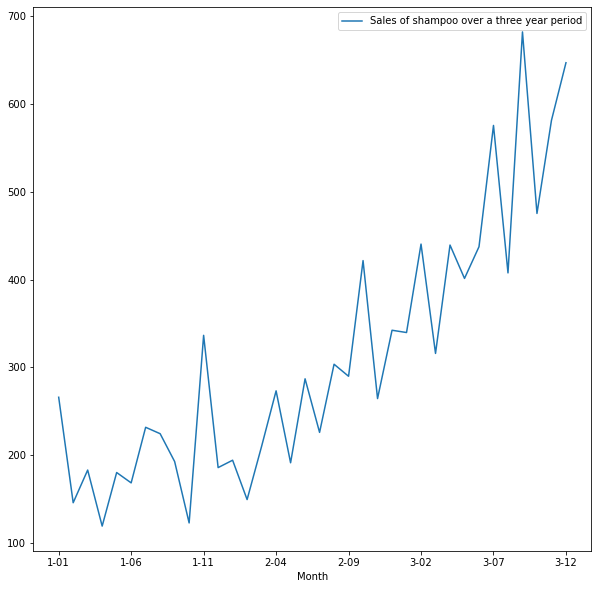

In [3]:
a = df.plot(figsize=(10,10))

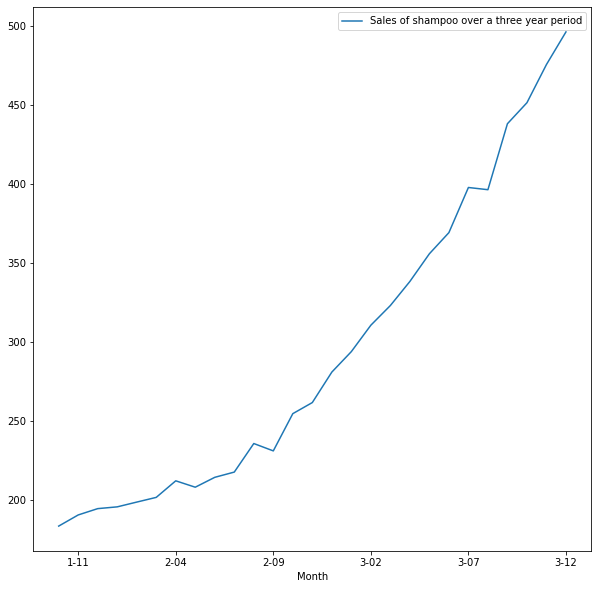

In [4]:
# WINDOW PLOTTING
df.rolling(window=10).mean().plot(figsize=(10,10))

In [5]:
sm.stats.durbin_watson(df.values)

array([0.09548538])

In [6]:
# BY VISULIAZATION & DURBIN_WATSON COEFF, our DATA IS IN UPWARD TREND , IT MEANS NOT STATIONARY
# so we will use ARIMA model


In [7]:
# for finding the values of P,D Q we will use AUTO-CORRELATION FACTOR & PARTIAL AUTO CORRELATION FACTOR

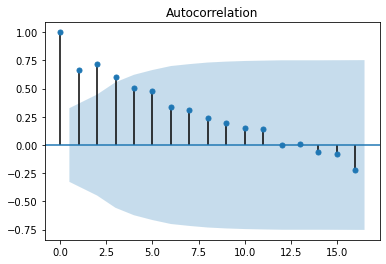

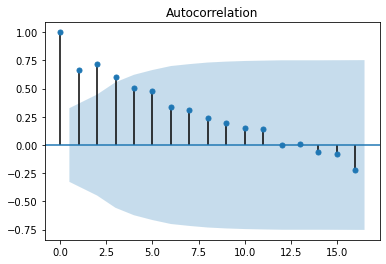

In [8]:
# ACF
sm.graphics.tsa.plot_acf(df.values)

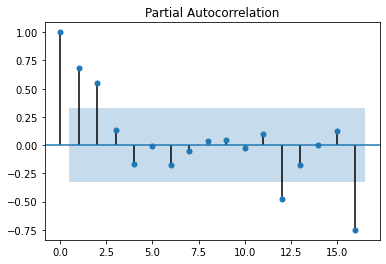

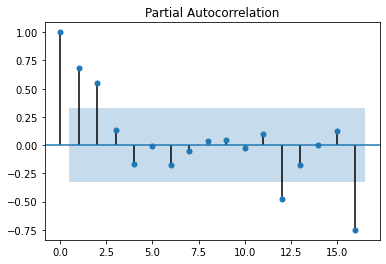

In [9]:
# PACF
sm.graphics.tsa.plot_pacf(df.values)

In [10]:
# so by ABOVE PLOTTING , 
p = 3
q = 2

In [11]:
# train test split
train = df[:25]
test = df[25:]
print(train.shape)
print(test.shape)

(25, 1)
(11, 1)


In [12]:
# MODEL CREATION
# d = 1
model_1 = ARIMA(train.values,order=(p,1,q)).fit()
model_1.aic

272.38919480711354

In [13]:
# MODEL CREATION
# d = 2
model_2 = ARIMA(train.values,order=(p,2,q)).fit()
model_2.aic

272.29005515017957

In [14]:
# we will select d = 2 for which AIC value is less

In [15]:
pred = model_2.forecast(steps=11)[0]

In [16]:
from sklearn.metrics import SCORERS,mean_squared_error

In [17]:
np.sqrt(mean_squared_error(test,pred))

97.18917506939552